# Part I - Loan Data From Prosper
## by Roseland Ambuku

## Introduction
Loans Data From Prosper is a dataset with 113,937 records of loans with 81 variables. The variables in the dataset include Loan Status, Listing Category, Borrower State and many more. The records belong to Prosper Bank that issues loans and other banking services to its clients. In this analysis we shall focus on the loan aspect of Prosper Bank's service delivery.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df_data = pd.read_csv('prosperLoanData.csv')

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df_data.shape

(113937, 81)

In [6]:
print(df_data.dtypes)

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


### Data Cleaning
##### The following are some of the steps that shall be carried out:
1. Choosing the subset of features(variables) that are important in the study. 
2. 
3. Converting the following datatypes: , TotalInquires and  to int.
4. Fill in the missing values of occupation and DebtToIncomeRatio.
5. 
6. 

In [7]:
columns = ['StatedMonthlyIncome','LoanStatus','DebtToIncomeRatio','EmploymentStatus','Recommendations','IncomeVerifiable',
           'ProsperScore','IsBorrowerHomeowner','Occupation','OpenRevolvingAccounts','OpenRevolvingMonthlyPayment',
           'CurrentCreditLines','OpenCreditLines','AmountDelinquent','DelinquenciesLast7Years','BankcardUtilization',
           'RevolvingCreditBalance','CurrentDelinquencies','OpenRevolvingAccounts','TotalInquiries','InquiriesLast6Months',
           'LoanOriginalAmount','LoanCurrentDaysDelinquent']
df_loans = df_data[columns]

In [8]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   StatedMonthlyIncome          113937 non-null  float64
 1   LoanStatus                   113937 non-null  object 
 2   DebtToIncomeRatio            105383 non-null  float64
 3   EmploymentStatus             111682 non-null  object 
 4   Recommendations              113937 non-null  int64  
 5   IncomeVerifiable             113937 non-null  bool   
 6   ProsperScore                 84853 non-null   float64
 7   IsBorrowerHomeowner          113937 non-null  bool   
 8   Occupation                   110349 non-null  object 
 9   OpenRevolvingAccounts        113937 non-null  int64  
 10  OpenRevolvingMonthlyPayment  113937 non-null  float64
 11  CurrentCreditLines           106333 non-null  float64
 12  OpenCreditLines              106333 non-null  float64
 13 

In [9]:
df_loans.sample(10)

,StatedMonthlyIncome,LoanStatus,DebtToIncomeRatio,EmploymentStatus,Recommendations,IncomeVerifiable,ProsperScore,IsBorrowerHomeowner,Occupation,OpenRevolvingAccounts,...,AmountDelinquent,DelinquenciesLast7Years,BankcardUtilization,RevolvingCreditBalance,CurrentDelinquencies,OpenRevolvingAccounts,TotalInquiries,InquiriesLast6Months,LoanOriginalAmount,LoanCurrentDaysDelinquent
57907,7083.333333,Current,0.26,Employed,0,True,6.0,False,Nurse (RN),7,...,0.0,0.0,0.42,5602.0,0.0,7,6.0,0.0,9000,0
19834,3000.000000,Completed,NaN,Employed,0,False,4.0,False,Professional,3,...,0.0,0.0,0.28,2288.0,0.0,3,7.0,5.0,5000,0
38387,5299.750000,Completed,0.20,Full-time,0,True,NaN,False,Professional,10,...,0.0,0.0,0.46,23990.0,0.0,10,0.0,0.0,11500,0
54549,1200.000000,Chargedoff,0.42,Full-time,0,True,NaN,False,Medical Technician,7,...,0.0,2.0,0.66,3110.0,0.0,7,4.0,2.0,2500,1298
29928,6166.666667,Chargedoff,0.29,Employed,0,True,5.0,True,Retail Management,7,...,5844.0,22.0,0.35,5783.0,3.0,7,0.0,0.0,9000,195
20752,11333.333333,Current,0.23,Employed,0,True,8.0,True,Attorney,5,...,0.0,0.0,0.82,28444.0,0.0,5,3.0,2.0,7500,0
87336,7500.000000,Current,0.26,Employed,0,True,5.0,False,Professional,10,...,0.0,63.0,0.00,644.0,0.0,10,12.0,1.0,25000,0
80854,4166.666667,Completed,0.36,Full-time,0,True,10.0,True,Other,16,...,0.0,0.0,0.55,31553.0,0.0,16,8.0,0.0,4000,0
87107,7500.000000,Chargedoff,0.32,Full-time,0,True,NaN,True,Nurse (RN),30,...,0.0,0.0,0.38,98772.0,0.0,30,7.0,3.0,20000,1669
44670,12291.666667,Completed,0.25,Full-time,0,True,NaN,True,Professional,12,...,0.0,0.0,0.81,81129.0,0.0,12,4.0,2.0,15000,0


In [10]:
#dropping duplicates in the dataset
df_loans = df_loans.drop_duplicates()

In [11]:
#filling in missing values of DebttoIncome using the mean value of the column
df_loans.DebtToIncomeRatio = df_loans.DebtToIncomeRatio.fillna(df_loans.DebtToIncomeRatio.mean())

In [12]:
#filling in the missing values in Occupation with unknown
df_loans.Occupation = df_loans.Occupation.fillna('Unknown')

In [13]:
#filling in the missing values in EmploymentStatus with unknown
df_loans.EmploymentStatus = df_loans.EmploymentStatus.fillna('Unknown')

In [14]:
#Replacing the null values in ProsperScore with the mode
df_loans.ProsperScore = df_loans.ProsperScore.fillna(df_loans.ProsperScore.mode()[0])

In [15]:
#Replacing the missing values in the columns below with median values since the data distribution is skewed to the right
df_loans[['CurrentDelinquencies','TotalInquiries','InquiriesLast6Months','CurrentCreditLines','OpenCreditLines','AmountDelinquent','DelinquenciesLast7Years','BankcardUtilization','RevolvingCreditBalance']] = df_loans[['CurrentDelinquencies','TotalInquiries','InquiriesLast6Months','CurrentCreditLines','OpenCreditLines','AmountDelinquent','DelinquenciesLast7Years','BankcardUtilization','RevolvingCreditBalance']].fillna(df_loans[['CurrentDelinquencies','TotalInquiries','InquiriesLast6Months','CurrentCreditLines','OpenCreditLines','AmountDelinquent','DelinquenciesLast7Years','BankcardUtilization','RevolvingCreditBalance']].median())

In [16]:
#Converting the necessary columns to int datatypes
df_loans.DelinquenciesLast7Years = df_loans.DelinquenciesLast7Years.astype('Int64')
df_loans.AmountDelinquent = df_loans.AmountDelinquent.astype('Int64')
df_loans.ProsperScore = df_loans.ProsperScore.astype('Int64')
df_loans.CurrentDelinquencies = df_loans.CurrentDelinquencies.astype('Int64')
df_loans.RevolvingCreditBalance = df_loans.RevolvingCreditBalance.astype('Int64')
df_loans.OpenRevolvingMonthlyPayment = df_loans.OpenRevolvingMonthlyPayment.astype('Int64')
df_loans. CurrentCreditLines= df_loans.CurrentCreditLines.astype('Int64')
df_loans.OpenCreditLines = df_loans.OpenCreditLines.astype('Int64')
df_loans.InquiriesLast6Months= df_loans.InquiriesLast6Months.astype('Int64')
df_loans.TotalInquiries = df_loans.TotalInquiries.astype('Int64')


In [17]:
#Checking the dataset 
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   StatedMonthlyIncome          113937 non-null  float64
 1   LoanStatus                   113937 non-null  object 
 2   DebtToIncomeRatio            113937 non-null  float64
 3   EmploymentStatus             113937 non-null  object 
 4   Recommendations              113937 non-null  int64  
 5   IncomeVerifiable             113937 non-null  bool   
 6   ProsperScore                 113937 non-null  Int64  
 7   IsBorrowerHomeowner          113937 non-null  bool   
 8   Occupation                   113937 non-null  object 
 9   OpenRevolvingAccounts        113937 non-null  int64  
 10  OpenRevolvingMonthlyPayment  113937 non-null  Int64  
 11  CurrentCreditLines           113937 non-null  Int64  
 12  OpenCreditLines              113937 non-null  Int64  
 13 

In [18]:
df_loans.sample(10)

,StatedMonthlyIncome,LoanStatus,DebtToIncomeRatio,EmploymentStatus,Recommendations,IncomeVerifiable,ProsperScore,IsBorrowerHomeowner,Occupation,OpenRevolvingAccounts,...,AmountDelinquent,DelinquenciesLast7Years,BankcardUtilization,RevolvingCreditBalance,CurrentDelinquencies,OpenRevolvingAccounts,TotalInquiries,InquiriesLast6Months,LoanOriginalAmount,LoanCurrentDaysDelinquent
110880,19166.666667,Current,0.13,Employed,0,True,10,False,Doctor,8,...,0,0,0.16,9726,0,8,5,2,20000,0
83965,7916.666667,Current,0.19,Employed,0,True,11,True,Other,11,...,0,0,0.22,18297,0,11,5,1,19000,0
29435,12083.333333,Chargedoff,0.16,Employed,0,True,8,True,Retail Management,10,...,0,0,0.35,19705,0,10,5,1,9000,385
29016,4583.333333,Current,0.35,Employed,0,True,3,False,Nurse (RN),9,...,0,0,0.69,10362,0,9,4,1,15000,0
9912,15250.000000,Current,0.20,Employed,0,True,4,True,Professional,8,...,0,0,0.73,23292,0,8,1,0,25000,0
109096,1666.666667,Current,0.22,Other,0,True,4,False,Unknown,8,...,0,0,0.26,3202,1,8,4,1,4000,0
108460,4083.333333,Current,0.51,Employed,0,True,4,False,Truck Driver,15,...,0,0,0.71,14456,0,15,0,0,10000,0
30998,4833.333333,Current,0.34,Employed,0,True,2,False,Professional,12,...,0,2,0.37,23074,0,12,5,4,4000,0
82746,2150.000000,Current,0.20,Other,0,True,5,True,Unknown,9,...,0,0,0.42,5102,0,9,2,1,4000,0
56375,6666.666667,Current,0.36,Employed,0,True,2,False,Sales - Commission,8,...,0,0,0.98,66615,0,8,6,2,3500,0


In [19]:
df_loans.describe()

,StatedMonthlyIncome,DebtToIncomeRatio,Recommendations,ProsperScore,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,CurrentCreditLines,OpenCreditLines,AmountDelinquent,DelinquenciesLast7Years,BankcardUtilization,RevolvingCreditBalance,CurrentDelinquencies,OpenRevolvingAccounts,TotalInquiries,InquiriesLast6Months,LoanOriginalAmount,LoanCurrentDaysDelinquent
count,1.139370e+05,113937.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,1.139370e+05,113937.000000,113937.00000,113937.000000,113937.000000,113937.00000,113937.000000
mean,5.608026e+03,0.275947,0.048027,5.452285,6.96979,398.292161,10.296023,9.242801,918.646866,4.118881,0.563891,1.699474e+04,0.588430,6.96979,5.568288,1.432423,8337.01385,152.816539
std,7.478497e+03,0.530643,0.332353,2.220136,4.63097,447.159711,5.273189,4.852581,6919.065398,10.123325,0.307278,3.189841e+04,1.973185,4.63097,6.399133,2.430277,6245.80058,466.320254
min,0.000000e+00,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,1000.00000,0.000000
25%,3.200333e+03,0.150000,0.000000,4.000000,4.00000,114.000000,7.000000,6.000000,0.000000,0.000000,0.330000,3.459000e+03,0.000000,4.00000,2.000000,0.000000,4000.00000,0.000000
50%,4.666667e+03,0.230000,0.000000,5.000000,6.00000,271.000000,10.000000,9.000000,0.000000,0.000000,0.600000,8.549000e+03,0.000000,6.00000,4.000000,1.000000,6500.00000,0.000000
75%,6.825000e+03,0.310000,0.000000,7.000000,9.00000,525.000000,13.000000,12.000000,0.000000,3.000000,0.820000,1.825400e+04,0.000000,9.00000,7.000000,2.000000,12000.00000,0.000000
max,1.750003e+06,10.010000,39.000000,11.000000,51.00000,14985.000000,59.000000,54.000000,463881.000000,99.000000,5.950000,1.435667e+06,83.000000,51.00000,379.000000,105.000000,35000.00000,2704.000000


### What is the structure of your dataset?

The dataset has 113,937 records and 22 features which will be explored in the study.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are DebtToIncome Ratio and Stated Monthly Income which will assist in determing the LoanStatus. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that will help support the investigation into what determines the status of a loan include Occupation, EmploymentStatus, IncomeVerifiable and CurrentDelinquiencies

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### DebtToIncomeRatio distribution

What is the preferred Debt to Income Ratio of Prosper Bank clients? 

Text(0.5, 1.0, 'Distribution of Debt to Income Ratio')

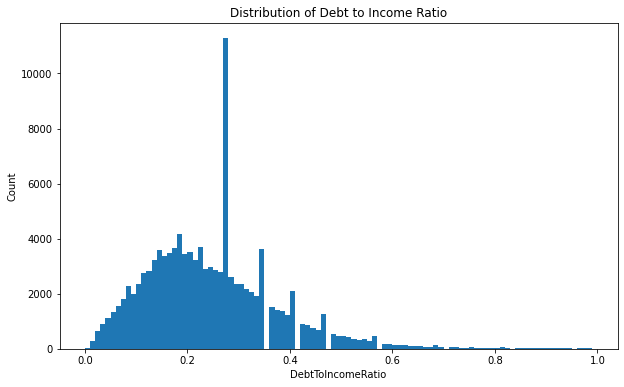

In [21]:
bins = np.arange(0,1,0.01)
plt.figure(figsize=[10,6])
plt.hist(data=df_loans,x='DebtToIncomeRatio',bins=bins);
plt.xlabel('DebtToIncomeRatio'); 
plt.ylabel('Count')
plt.title('Distribution of Debt to Income Ratio')

Most clients of Prosper Bank prefer 1:4 ratio of debt to income evidenced by a peak at 0.25

#### Open Credit Lines 
> Q?

Text(0.5, 1.0, 'Distribution of OpenCreditLines')

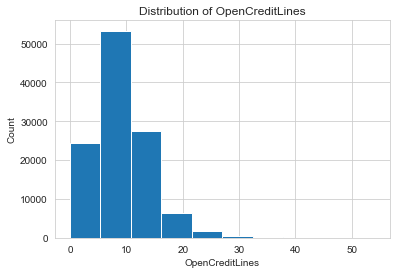

In [114]:
plt.hist(df_loans['OpenCreditLines']);
plt.xlabel('OpenCreditLines')
plt.ylabel('Count')
plt.title('Distribution of OpenCreditLines')

O :

### Monthly Income Distribution
What is the stated monthly income of clients of Prosper Bank?

Text(0.5, 1.0, 'Distribution of Monthly Income')

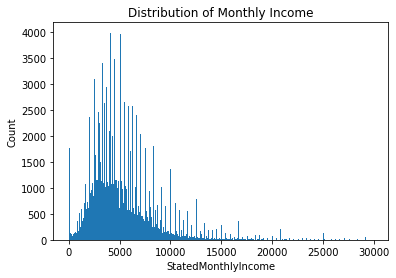

In [22]:
smi_bins = np.arange(0,30000,100)
plt.hist(data = df_loans, x = 'StatedMonthlyIncome',bins=smi_bins);
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count')
plt.title('Distribution of Monthly Income')

The data from the visualization is skewed to the right, with a peak at $5000

#### Current Credit Lines Distribution
Q ?

Text(0.5, 1.0, 'Distribution of CurrentCreditLines')

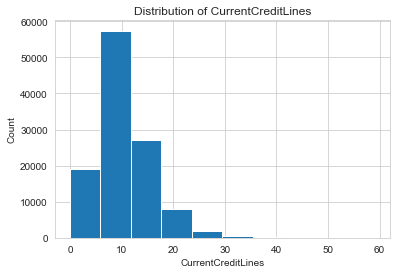

In [113]:
plt.hist(df_loans['CurrentCreditLines']);
plt.xlabel('CurrentCreditLines')
plt.ylabel('Count')
plt.title('Distribution of CurrentCreditLines')

O :

#### Revolving Credit Balance Distribution
Q ?

Text(0.5, 1.0, 'Distribution of Revolving Credit Balance')

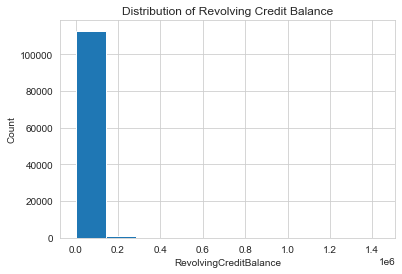

In [110]:
# rcbd_bin=np.arange(0,0.5,0.05),bins=rcbd_bin
plt.hist(df_loans['RevolvingCreditBalance']);
plt.xlabel('RevolvingCreditBalance')
plt.ylabel('Count')
plt.title('Distribution of Revolving Credit Balance')

O :

#### Open Revolving Accounts Distribution
Q ?

Text(0.5, 1.0, 'Distribution of OpenRevolvingAccounts')

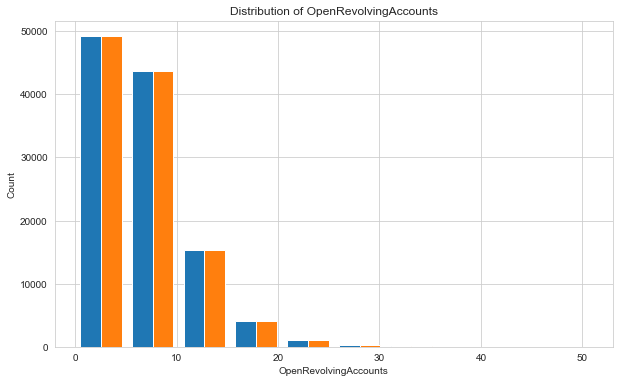

In [109]:
plt.figure(figsize=[10,6])
plt.hist(df_loans['OpenRevolvingAccounts']);
plt.xlabel('OpenRevolvingAccounts')
plt.ylabel('Count')
plt.title('Distribution of OpenRevolvingAccounts')

O :

### The Original Loan Amount

What is the original amount of loans taken out by clients of Prosper Bank?

Text(0.5, 1.0, 'Distribution of LoanOriginalAmount')

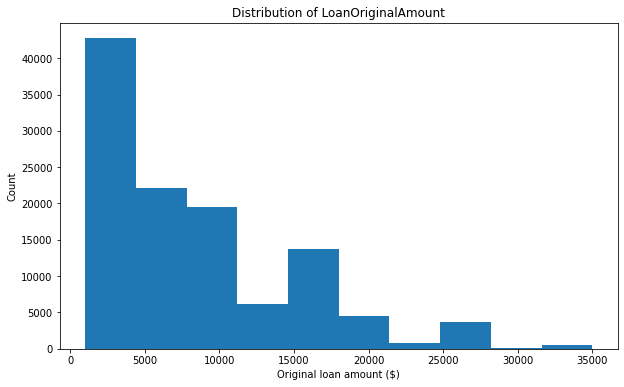

In [23]:
# Loan Original Amount distribution
plt.figure(figsize=[10,6])
plt.hist(df_loans['LoanOriginalAmount']);
plt.xlabel('Original loan amount ($)')
plt.ylabel('Count')
plt.title('Distribution of LoanOriginalAmount')

Most clients take out loans of $5k and second preferred loan amount is $10k and the third is $15k. Most loans taken out by clients are in multiples of 5k

#### Total Inquiries Distribution
Q ?

Text(0.5, 1.0, 'Distribution of Total Inquiries')

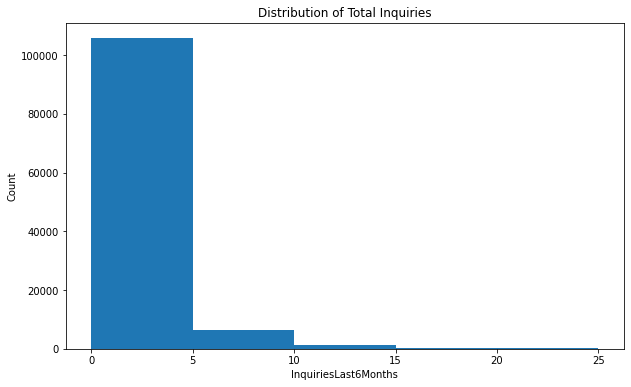

In [24]:
lm_bins = np.arange(0,30,5)
plt.figure(figsize=[10,6])
plt.hist(df_loans['InquiriesLast6Months'],bins=lm_bins)
plt.xlabel('InquiriesLast6Months')
plt.ylabel('Count')
plt.title('Distribution of Total Inquiries')

O :

### Current Delinquencies Distribution
Q ?

Text(0.5, 1.0, 'Distribution of CurrentDelinquencies')

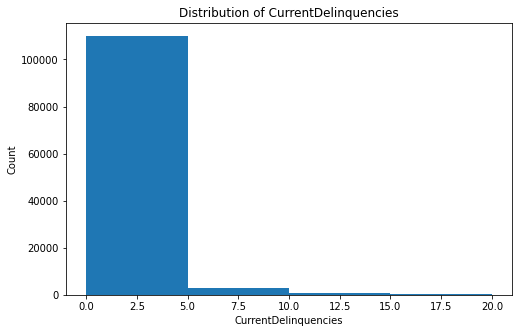

In [25]:
cd_bins = np.arange(0,25,5)
plt.figure(figsize=[8,5])
plt.hist(df_loans['CurrentDelinquencies'],bins=cd_bins);
plt.xlabel('CurrentDelinquencies')
plt.ylabel('Count')
plt.title('Distribution of CurrentDelinquencies')

O :

#### Loan Status Distribution
Q ?

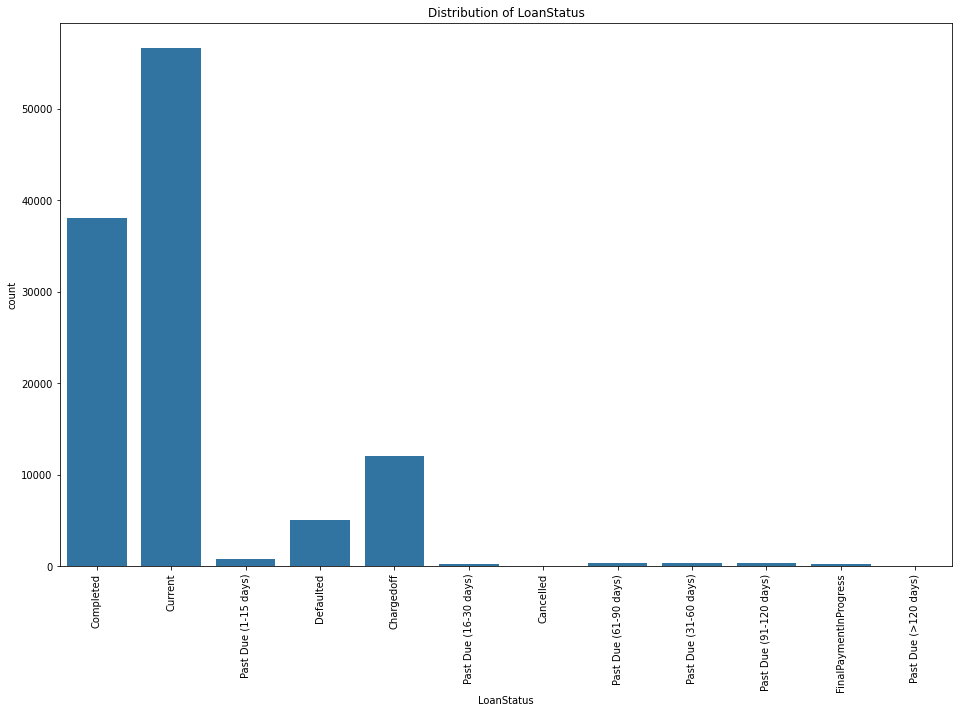

In [26]:
plt.figure(figsize=[16,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loans, x = 'LoanStatus',color=default_color).set(title='Distribution of LoanStatus');
plt.xticks(rotation=90);

O :

In [27]:
#Ordering the categories in Employment Status
employ_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
employ_var = pd.api.types.CategoricalDtype(ordered = True,categories = employ_order)
df_loans['EmploymentStatus'] = df_loans['EmploymentStatus'].astype(employ_var)


#### Employment Status Distribution
Q ?

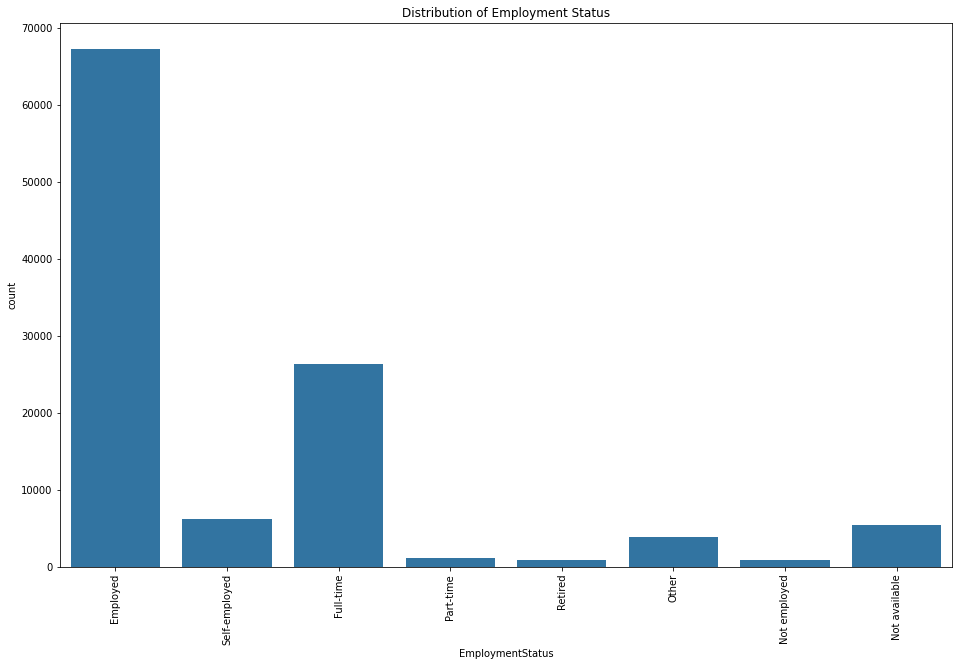

In [28]:
plt.figure(figsize=[16,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loans, x = 'EmploymentStatus',color=default_color).set(title='Distribution of Employment Status');
plt.xticks(rotation=90);

O :

#### Occupation Distribution 
Q ?

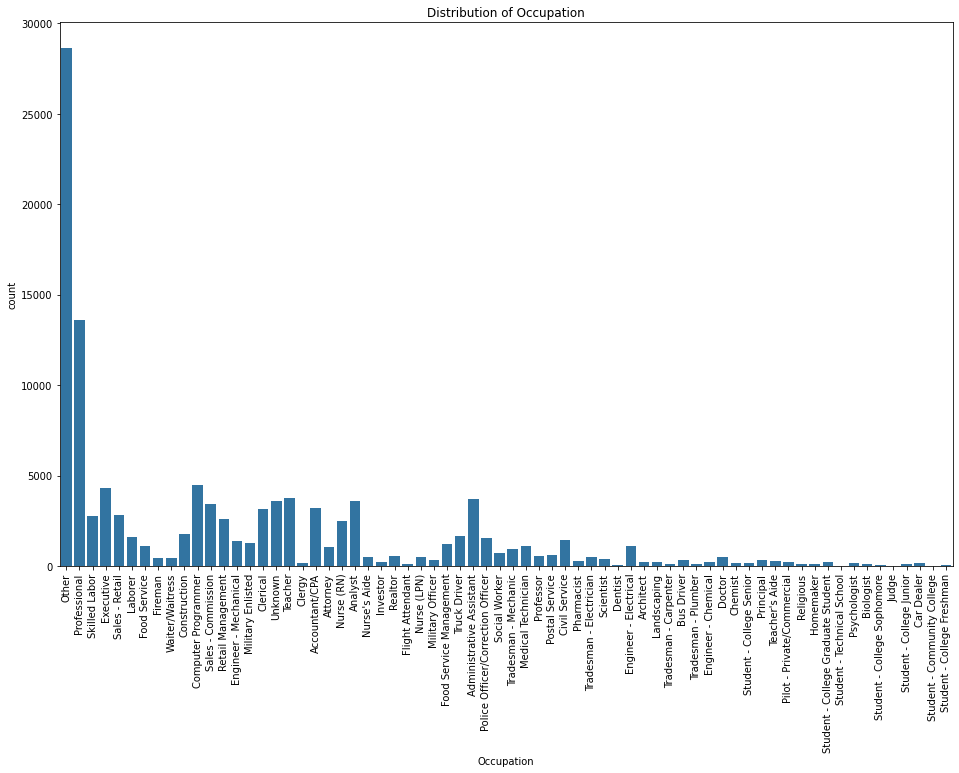

In [29]:
plt.figure(figsize=[16,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loans, x = 'Occupation',color=default_color).set(title='Distribution of Occupation');
plt.xticks(rotation=90);

O :



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Debt to Income Ratio against Loan Status
Q ?

Text(0.5, 1.0, 'Scatterplot of  DebtToIncome Ratio vs Loan Status')

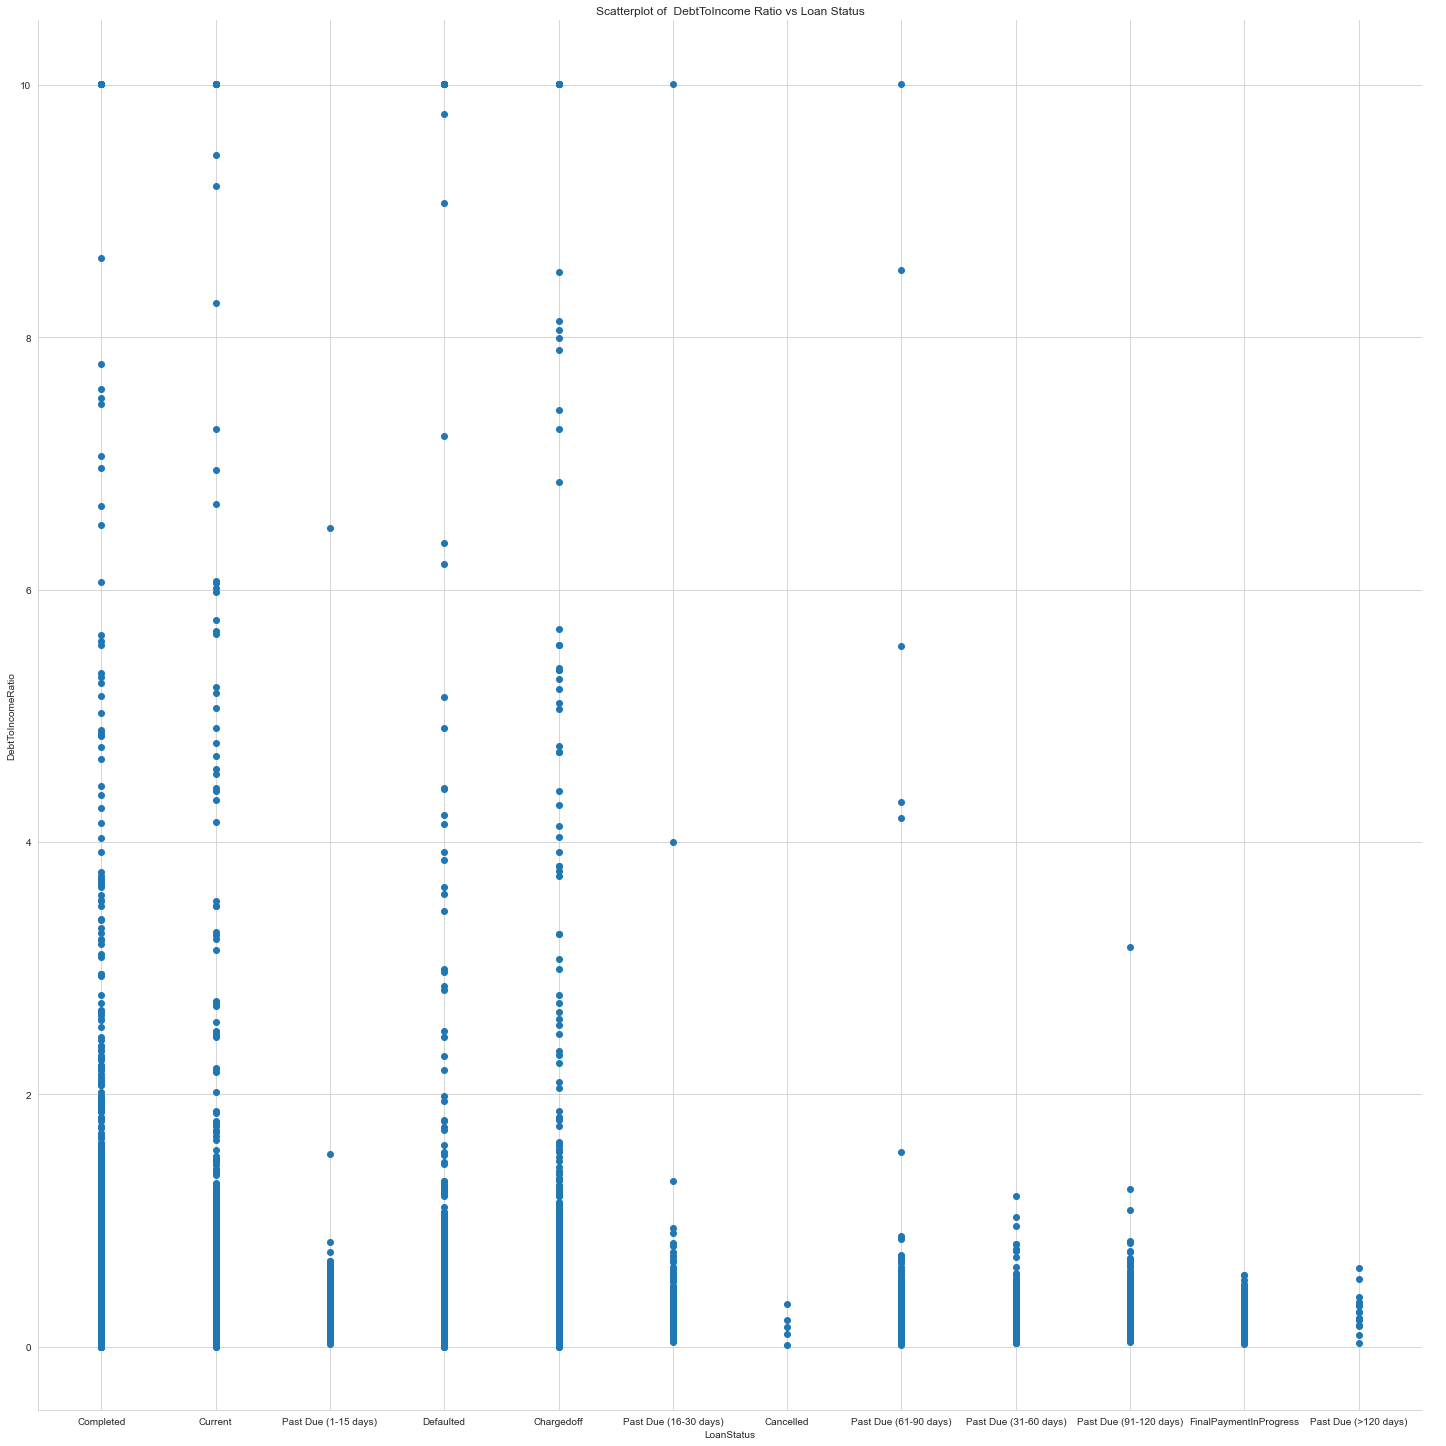

In [48]:
sb.set_style('whitegrid')
sb.FacetGrid(df_loans,height=20).map(plt.scatter,'LoanStatus','DebtToIncomeRatio').add_legend()
plt.title('Scatterplot of  DebtToIncome Ratio vs Loan Status')

O :

#### Current Delinquencies vs Loan Status
Q ?

Text(0.5, 1.0, 'Scatterplot of  Current Delinquencies vs Loan Status')

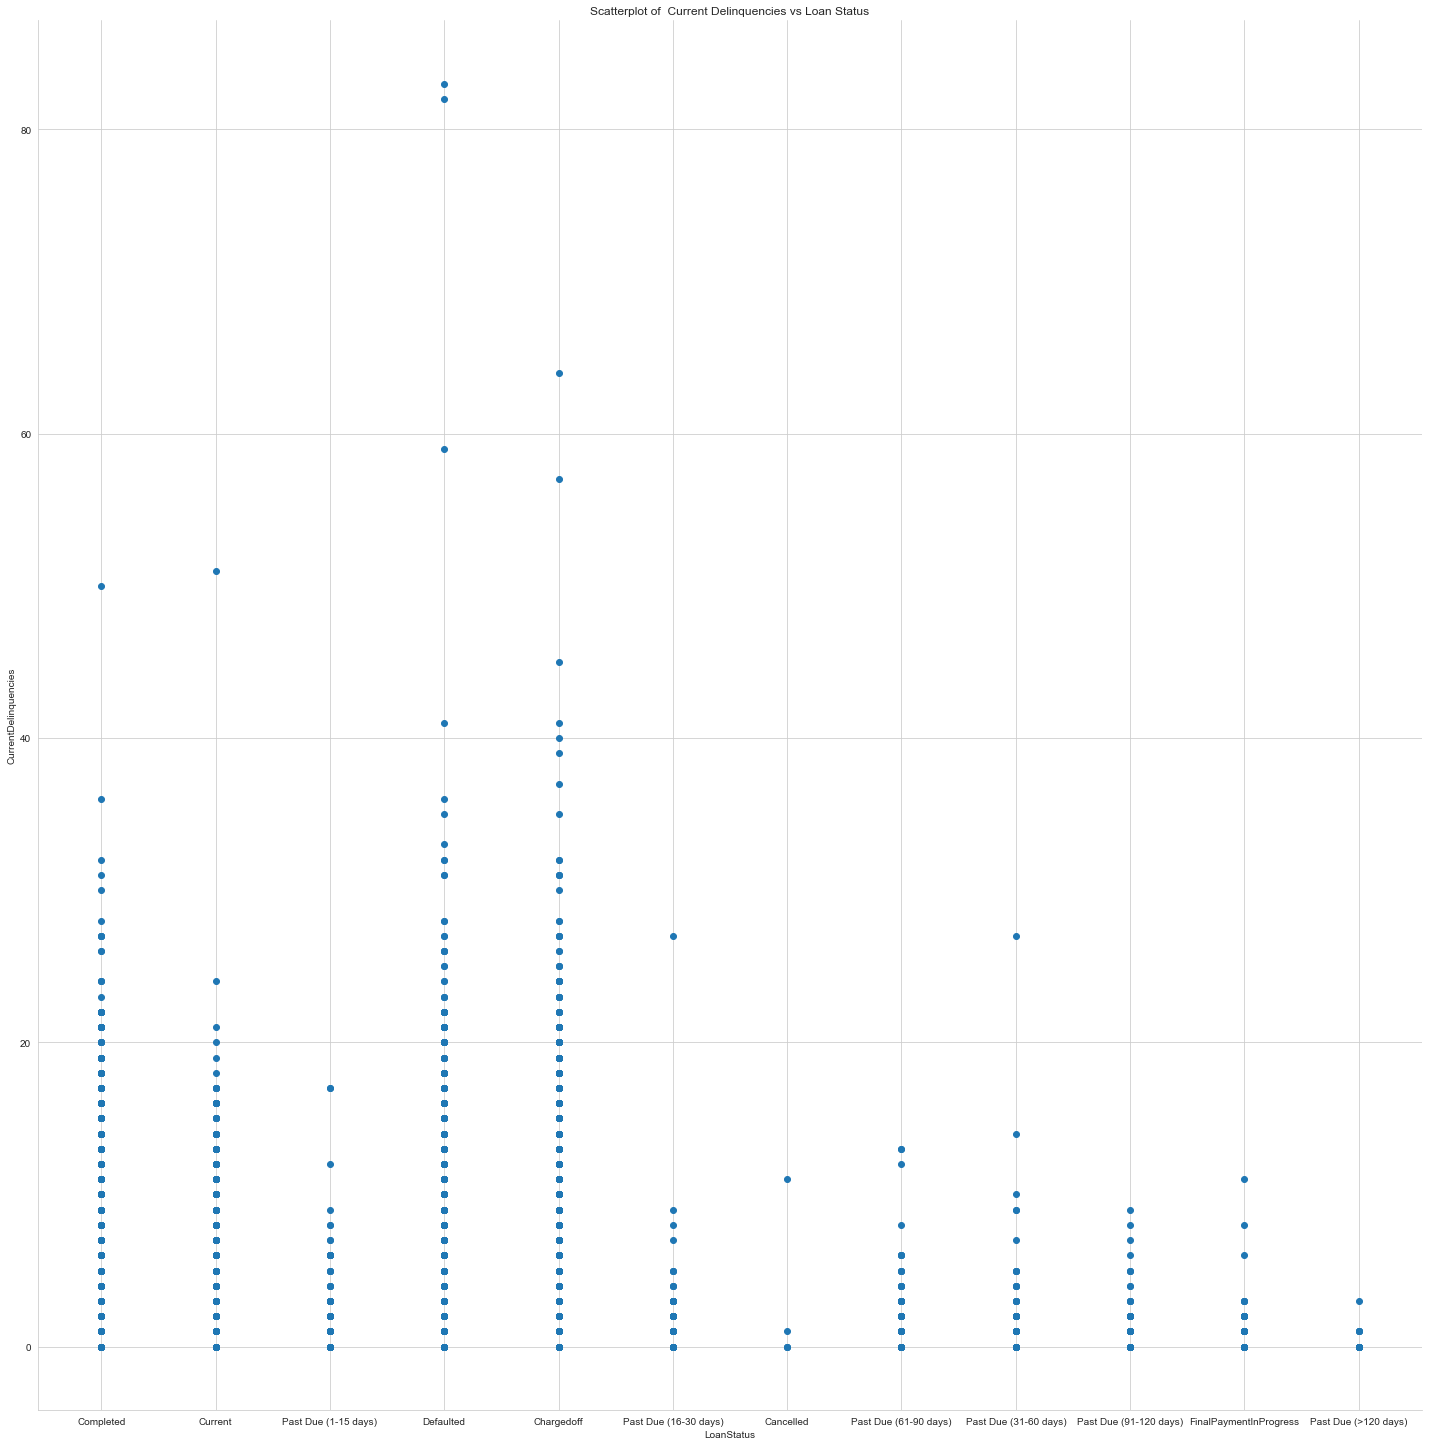

In [51]:
sb.set_style('whitegrid')
sb.FacetGrid(df_loans,height=20).map(plt.scatter,'LoanStatus','CurrentDelinquencies').add_legend()
plt.title('Scatterplot of  Current Delinquencies vs Loan Status')

O :

#### Amount Delinquent vs Loan Original Amount
Q ?

Text(0.5, 1.0, 'BoxPlot Amount Delinnquent vs Loan Original Amount')

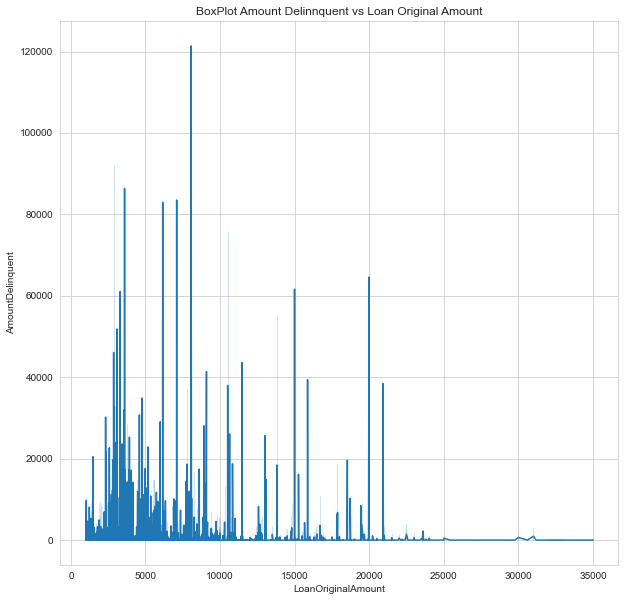

In [81]:
plt.figure(figsize = [10, 10])
sb.lineplot(data = df_loans, y = 'AmountDelinquent', x = 'LoanOriginalAmount');
plt.title('LinePlot Amount Delinnquent vs Loan Original Amount')

#### 

O :

#### DebtToIncome Ratio vs StatedMonthlyIncome
Q ?

Text(0.5, 1.0, 'LinePlot of DebtToIncome Ratio against StatedMonthlyIncome')

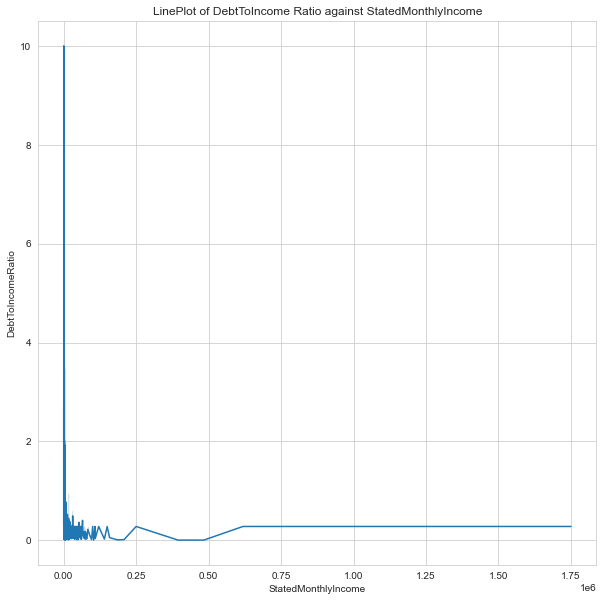

In [80]:
plt.figure(figsize= [10,10])
sb.lineplot(data=df_loans,x='StatedMonthlyIncome',y='DebtToIncomeRatio')
plt.title('LinePlot of DebtToIncome Ratio against StatedMonthlyIncome')

O :

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### DebtTo Income Ratio, Income Verifiable and LoanStatus
Q ?

Text(0.5, 1.0, 'Scatterplot of  DebtToIncome, IncomeVerifiable Ratio vs Loan Status')

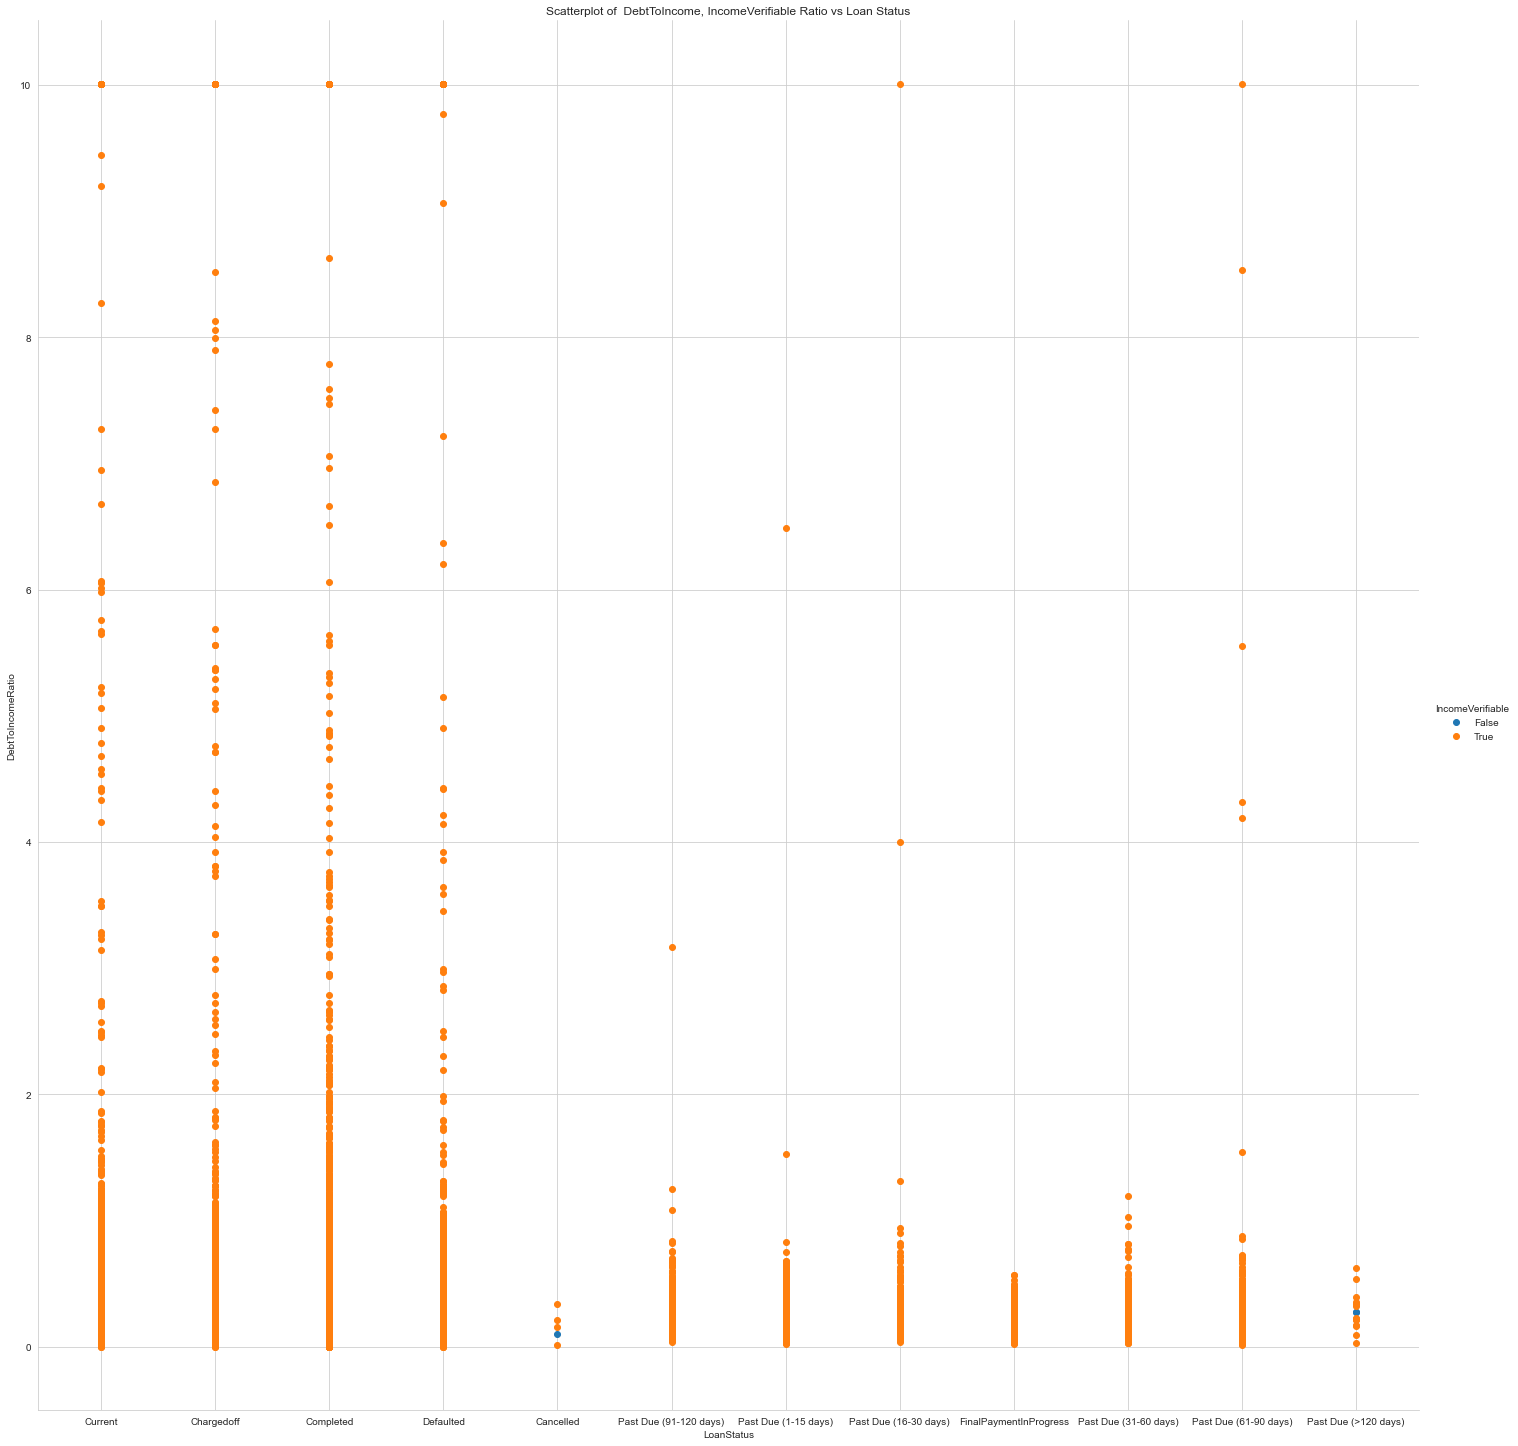

In [75]:
sb.set_style('whitegrid')
sb.FacetGrid(df_loans,hue='IncomeVerifiable',height=20).map(plt.scatter,'LoanStatus','DebtToIncomeRatio').add_legend()
plt.title('Scatterplot of  DebtToIncome, IncomeVerifiable Ratio vs Loan Status')

O :

#### Stated Monthly Income, Homeownership of Borrower and Loan Status
Q ?

Text(0.5, 1.0, 'Scatterplot of  Is Borrower Homeowner, Stated Monthly Income vs Loan Status')

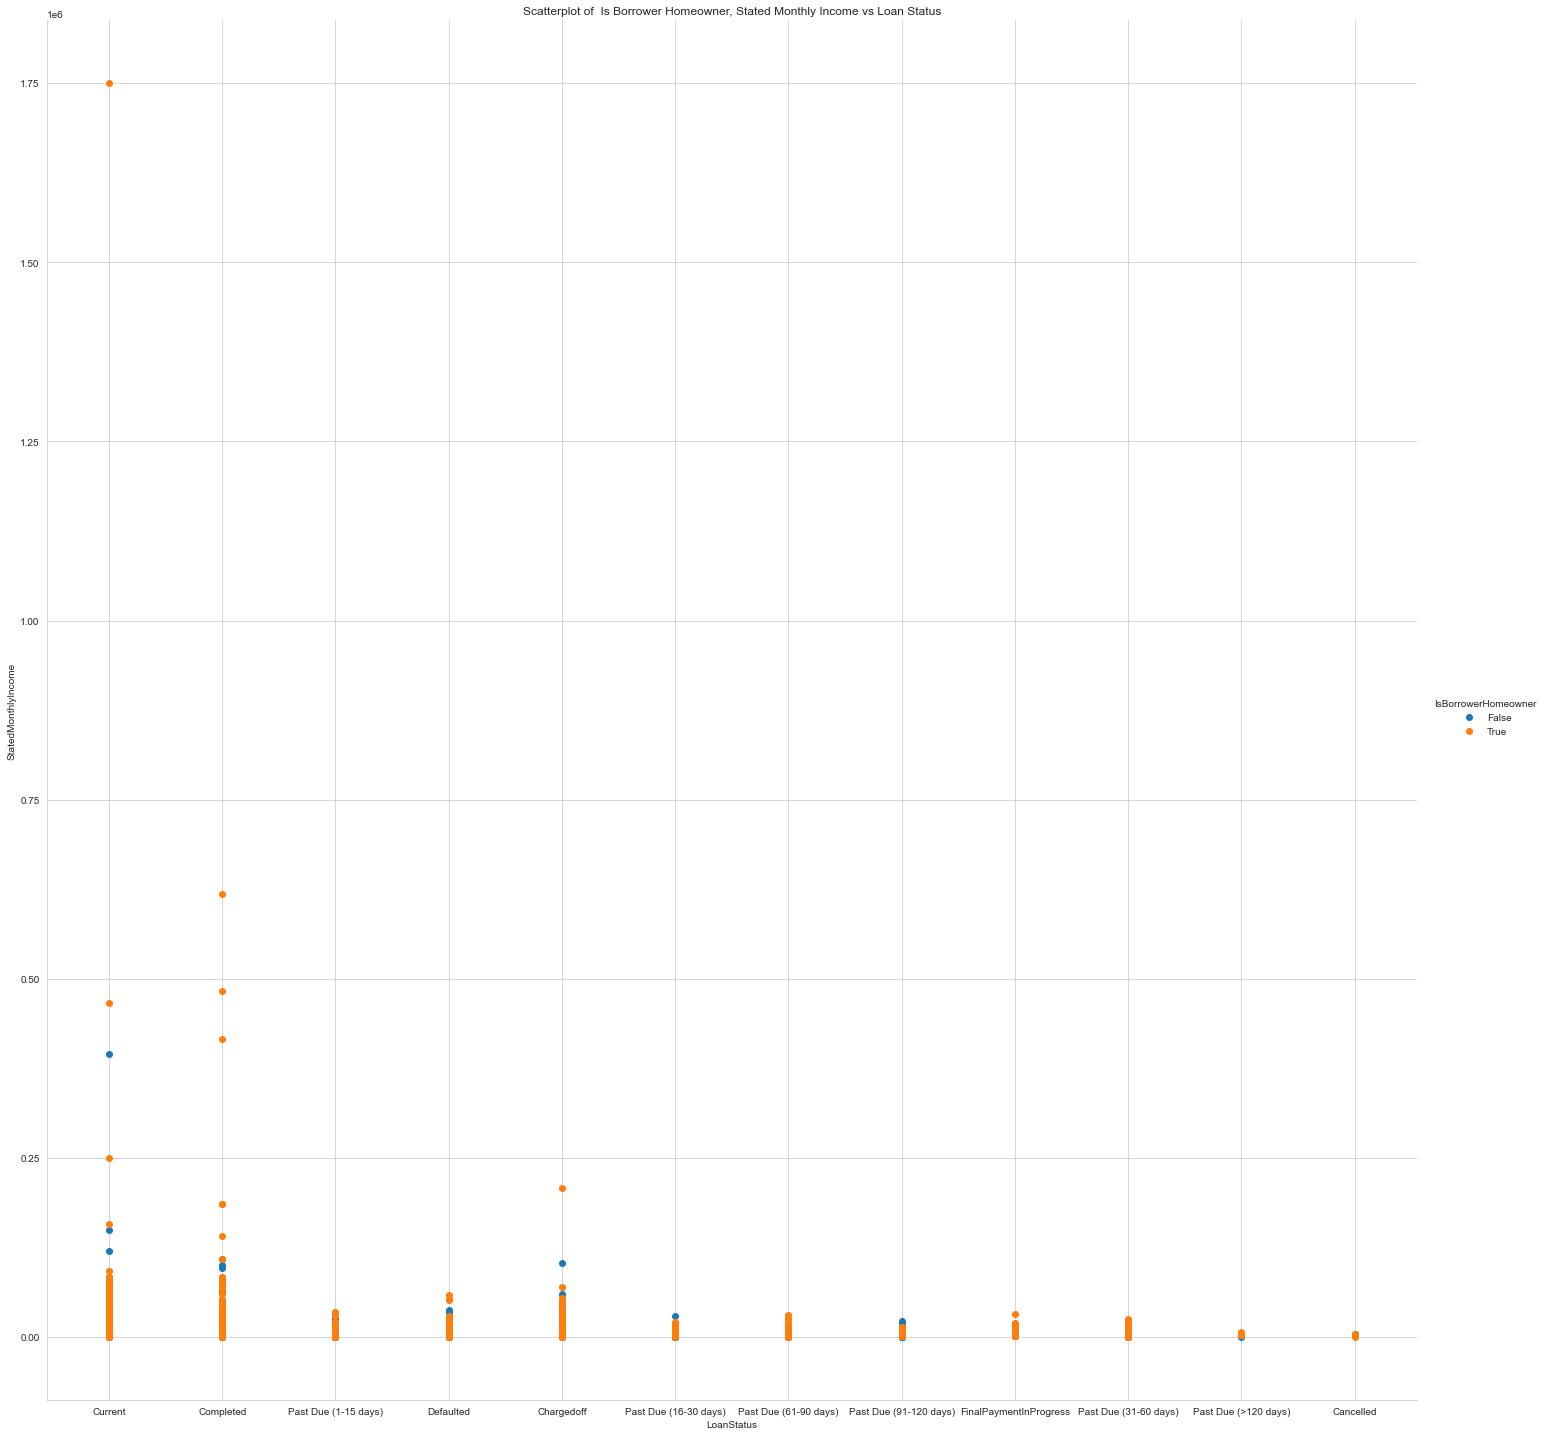

In [49]:
sb.set_style('whitegrid')
sb.FacetGrid(df_loans,hue='IsBorrowerHomeowner',height=20).map(plt.scatter,'LoanStatus','StatedMonthlyIncome').add_legend()
plt.title('Scatterplot of  Is Borrower Homeowner, Stated Monthly Income vs Loan Status')

O :

#### Borrower Homeownership, LoanOriginal vs Loan Status
Q ?

Text(0.5, 1.0, 'Scatterplot of  Is Borrower Homeowner, LoanOriginal vs Loan Status')

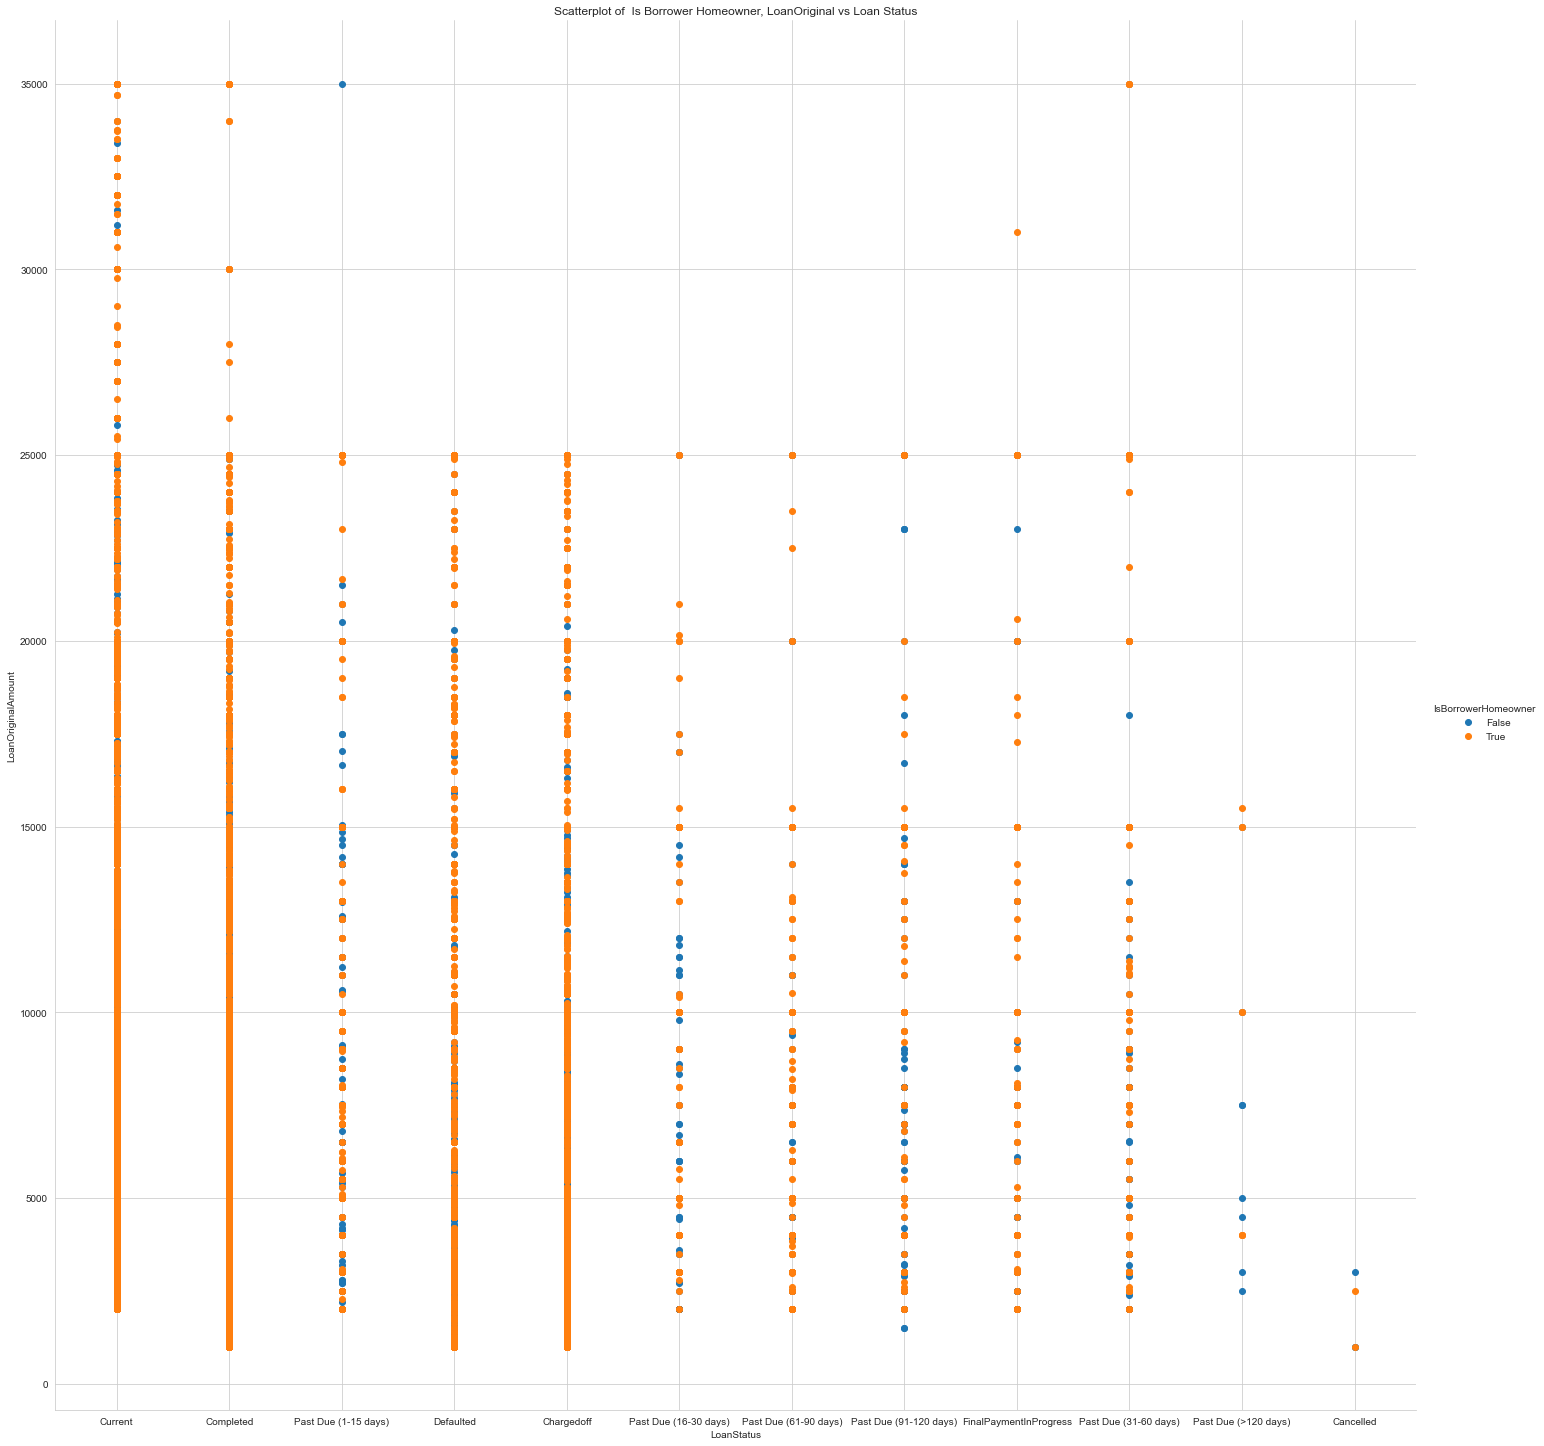

In [69]:
sb.set_style('whitegrid')
sb.FacetGrid(df_loans,hue='IsBorrowerHomeowner',height=20).map(plt.scatter,'LoanStatus','LoanOriginalAmount').add_legend()
plt.title('Scatterplot of  Is Borrower Homeowner, LoanOriginal vs Loan Status')

O :

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [ ]:
#The final and cleaned dataset
